In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
nfl_games = pd.read_excel('../Desktop/nfl_elo_2.xlsx')
nfl_spreads = pd.read_excel('../Desktop/nfl_elo_2.xlsx')
nfl_spreads['spread'] = (nfl_spreads['elo1_pre'] - nfl_spreads['elo2_pre']) / 25.0
#filter for home losses
home_losses = nfl_spreads[nfl_spreads.score1 < nfl_spreads.score2]
home_wins = nfl_spreads[nfl_spreads.score1 > nfl_spreads.score2]
nfl_spreads = nfl_spreads[nfl_spreads.score1 < nfl_spreads.score2]
home_losses.describe()
nfl_spreads['followed_by_win'] = 0.5
nfl_spreads

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating,spread,followed_by_win
21,1920-10-17,1920,0,NaN,RII,CHI,1559.405000,1402.774000,0.781736,0.218264,...,NaN,NaN,NaN,0.0,7.0,NaN,NaN,NaN,6.265240,0.5
31,1920-10-24,1920,0,NaN,CHT,CHI,1343.231000,1438.927000,0.455939,0.544061,...,NaN,NaN,NaN,0.0,10.0,NaN,NaN,NaN,-3.827840,0.5
36,1920-10-31,1920,0,NaN,CBD,AKR,1543.215000,1558.607000,0.570910,0.429090,...,NaN,NaN,NaN,0.0,10.0,NaN,NaN,NaN,-0.615680,0.5
38,1920-10-31,1920,0,NaN,LOG,HAM,1300.000000,1405.710000,0.441680,0.558320,...,NaN,NaN,NaN,9.0,14.0,NaN,NaN,NaN,-4.228400,0.5
39,1920-10-31,1920,0,NaN,RCK,CHI,1300.000000,1460.492000,0.365935,0.634065,...,NaN,NaN,NaN,0.0,29.0,NaN,NaN,NaN,-6.419680,0.5
41,1920-11-07,1920,0,NaN,CHT,ARI,1313.938000,1507.955000,0.322418,0.677582,...,NaN,NaN,NaN,3.0,6.0,NaN,NaN,NaN,-7.760680,0.5
43,1920-11-07,1920,0,NaN,CTI,CBD,1459.443000,1515.204000,0.513293,0.486707,...,NaN,NaN,NaN,0.0,18.0,NaN,NaN,NaN,-2.230440,0.5
46,1920-11-07,1920,0,NaN,PUL,HAM,1300.000000,1421.250000,0.419750,0.580250,...,NaN,NaN,NaN,13.0,14.0,NaN,NaN,NaN,-4.850000,0.5
47,1920-11-07,1920,0,NaN,ZAN,COL,1300.000000,1394.807000,0.457209,0.542791,...,NaN,NaN,NaN,0.0,10.0,NaN,NaN,NaN,-3.792280,0.5
48,1920-11-11,1920,0,NaN,CHL,CHI,1300.000000,1489.670000,0.327909,0.672091,...,NaN,NaN,NaN,0.0,20.0,NaN,NaN,NaN,-7.586800,0.5


,season,neutral,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,qbelo1_pre,qbelo2_pre,...,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating,spread,followed_by_win
count,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1024.000000,1024.000000,...,1024.000000,1024.000000,1024.000000,1135.000000,1135.000000,1024.000000,15.000000,15.000000,1135.000000,1135.0
mean,1985.651101,0.003524,1572.297035,1429.550300,0.762588,0.237412,1538.023255,1463.824085,1571.811373,1436.396422,...,86.705381,1538.734091,1469.473704,15.622026,24.511894,48.046875,43.666667,47.866667,5.709869,0.5
std,24.690569,0.059287,81.111338,80.935810,0.053036,0.053036,81.073246,81.282172,78.255937,78.008932,...,50.452958,77.759422,78.681627,8.223233,8.821350,29.273740,22.448884,23.838344,2.271166,0.0
min,1920.000000,0.000000,1330.748000,1166.933000,0.625694,0.065295,1279.933000,1219.866000,1328.560133,1164.327676,...,-24.632353,1276.444056,1216.443753,0.000000,3.000000,0.000000,1.000000,1.000000,3.002760,0.5
25%,1970.000000,0.000000,1515.777000,1374.608872,0.717750,0.201358,1484.289500,1408.421500,1518.197750,1383.260382,...,50.167818,1486.837995,1415.741270,10.000000,19.000000,21.000000,27.000000,33.000000,3.892620,0.5
50%,1989.000000,0.000000,1572.048267,1430.288657,0.753310,0.246690,1537.347000,1467.827000,1572.801727,1435.423538,...,81.945758,1541.696174,1470.764811,16.000000,24.000000,49.000000,52.000000,50.000000,5.173080,0.5
75%,2006.000000,0.000000,1629.417500,1486.650500,0.798642,0.282250,1595.476186,1517.816000,1625.439896,1489.695752,...,121.473879,1591.334878,1521.575773,21.000000,30.000000,74.000000,58.500000,69.000000,6.974120,0.5
max,2021.000000,1.000000,1800.313000,1701.910000,0.934705,0.374306,1764.042000,1729.032000,1789.874163,1713.031349,...,265.719104,1749.841648,1739.759194,42.000000,59.000000,100.000000,72.000000,80.000000,15.892720,0.5


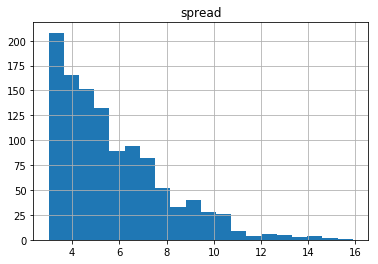

In [25]:
#filter for home upsets by spread
nfl_spreads = nfl_spreads[nfl_spreads.spread > 3]
nfl_spreads.hist(column='spread', bins = 20)
nfl_spreads = nfl_spreads.sort_values(by = ['spread'], ascending = False)
nfl_spreads_by_date = nfl_spreads.sort_values(by = ['date'], ascending = False)
nfl_spreads.describe()

In [26]:
#iterate through biggest upsets and find the game after
home_wins = 0
away_wins = 0
ties = 0
for index, row in nfl_games.iterrows():
    if((row.score1 > row.score2) and row.neutral == 0):
        home_wins += 1
    elif((row.score1 < row.score2) and row.neutral == 0):
        away_wins += 1
    elif((row.score1 == row.score2) and row.neutral == 0):
        ties += 1
    else:
        dummy = 0

print("HOME_WINS")
print(home_wins)
print("AWAY_WINS")
print(away_wins)
print("TIES")
print(ties)

HOME_WINS
9612
AWAY_WINS
6995
TIES
316


In [27]:
#iterate through biggest upsets and find the game after
home_wins = 0
away_wins = 0
home_losses = 0
away_losses = 0
home_ties = 0
away_ties = 0
for index, row in nfl_spreads.iterrows():
    team_name = nfl_spreads.loc[index].team1
    for i in range(index+1,index+100):
        if i > 17050:
            break
        if (nfl_games.loc[i].team1 == team_name or nfl_games.loc[i].team2 == team_name) and nfl_games.loc[i].season == nfl_spreads.loc[index].season:
            home_name = nfl_games.loc[i].team1
            away_name = nfl_games.loc[i].team2
            if home_name == team_name:
                if nfl_games.loc[i].score1 > nfl_games.loc[i].score2:
                    nfl_spreads.set_value(index,'followed_by_win', 1)
                    home_wins += 1
                elif nfl_games.loc[i].score1 == nfl_games.loc[i].score2:
                    nfl_spreads.set_value(index,'followed_by_win', 0.5)
                    home_ties += 1
                else:
                    nfl_spreads.set_value(index,'followed_by_win', 0)
                    home_losses += 1
                    
            elif away_name == team_name:
                if nfl_games.loc[i].score2 >= nfl_games.loc[i].score1:
                    nfl_spreads.set_value(index,'followed_by_win', 1)
                    away_wins += 1
                elif nfl_games.loc[i].score2 == nfl_games.loc[i].score1:
                    nfl_spreads.set_value(index,'followed_by_win', 0.5)
                    away_ties += 1
                else:
                    nfl_spreads.set_value(index,'followed_by_win', 0)
                    away_losses += 1
            break
print("Home Stats")
print(home_wins)
print(home_losses)
print(home_ties)
print(home_wins * 1.0 / (home_wins + home_losses))

print("Away Stats")
print(away_wins)
print(away_losses)
print(away_ties)
print(away_wins * 1.0 / (away_wins + away_losses))

/Users/chrismoranda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/chrismoranda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:35: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/chrismoranda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/chrismoranda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/chrismoranda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Pleas

Home Stats
204
161
8
0.5589041095890411
Away Stats
342
351
0
0.4935064935064935


In [28]:
nfl_spreads

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating,spread,followed_by_win
13375,2008-09-21,2008,0,NaN,NE,MIA,1731.860000,1334.542000,0.934705,0.065295,...,99.779045,1648.022533,1409.045292,13.0,38.0,18.0,NaN,NaN,15.892720,1.0
10145,1995-12-03,1995,0,NaN,DAL,WSH,1728.324000,1357.443000,0.924780,0.075220,...,38.537573,1658.288790,1420.165152,17.0,24.0,60.0,NaN,NaN,14.835240,0.0
5103,1972-12-17,1972,0,NaN,WSH,BUF,1683.640000,1315.934000,0.923498,0.076502,...,57.900114,1623.813936,1365.323232,17.0,24.0,42.0,NaN,NaN,14.708240,1.0
11931,2002-12-08,2002,0,NaN,PIT,HOU,1603.513000,1241.871000,0.920995,0.079005,...,2.799497,1553.966589,1342.510038,6.0,24.0,7.0,NaN,NaN,14.465680,1.0
16760,2020-12-20,2020,0,NaN,LAR,NYJ,1624.805176,1266.064597,0.919772,0.080228,...,83.705873,1584.362981,1304.122094,20.0,23.0,11.0,NaN,NaN,14.349623,0.0
4158,1967-12-17,1967,0,NaN,GB,PIT,1711.199000,1356.872000,0.917877,0.082123,...,18.015891,1667.964536,1418.467570,17.0,24.0,47.0,NaN,NaN,14.173080,1.0
16788,2021-01-03,2020,0,NaN,KC,LAC,1777.933310,1427.636782,0.916111,0.083889,...,199.589267,1711.217029,1472.719037,21.0,38.0,52.0,NaN,NaN,14.011861,1.0
16514,2019-12-29,2019,0,NaN,NE,MIA,1680.877424,1337.288421,0.913095,0.086905,...,178.988363,1655.270111,1350.221444,24.0,27.0,44.0,NaN,NaN,13.743560,0.0
11643,2001-12-02,2001,0,NaN,OAK,ARI,1669.865000,1333.283000,0.909841,0.090159,...,106.438841,1626.171532,1375.260756,31.0,34.0,51.0,NaN,NaN,13.463280,1.0
5391,1974-10-27,1974,0,NaN,CIN,TEN,1623.036000,1288.571000,0.908836,0.091164,...,75.678385,1563.654374,1355.172259,21.0,34.0,33.0,NaN,NaN,13.378600,1.0


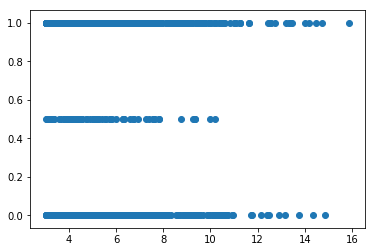

In [29]:
plt.scatter(x = nfl_spreads.spread, y = nfl_spreads.followed_by_win)

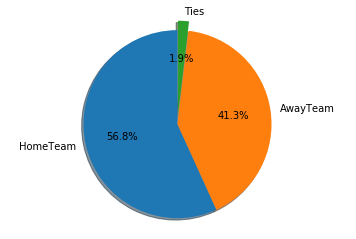

In [31]:
labels = ['HomeTeam', 'AwayTeam', 'Ties']
nums = [9612, 6995, 316]
explode = (0,0,0.1)
fig1, ax1 = plt.subplots()
ax1.pie(nums, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()